# RNS Vectorization timing

This notebook parses `Result.csv`, output of `./timing`.

You may need to install the json module and matplotlib:
```shell
pip install json
pip install matplotlib
```

In [1]:
import json
import matplotlib.pyplot as plt
f = open("Results.json", "r")
data = json.loads(f.read())

In [25]:
def pick(data: dict, operation: str, mode: str, measure: str):
    res = []
    for m in data[operation][mode]:
        res.append(m[measure])
    return min(res)

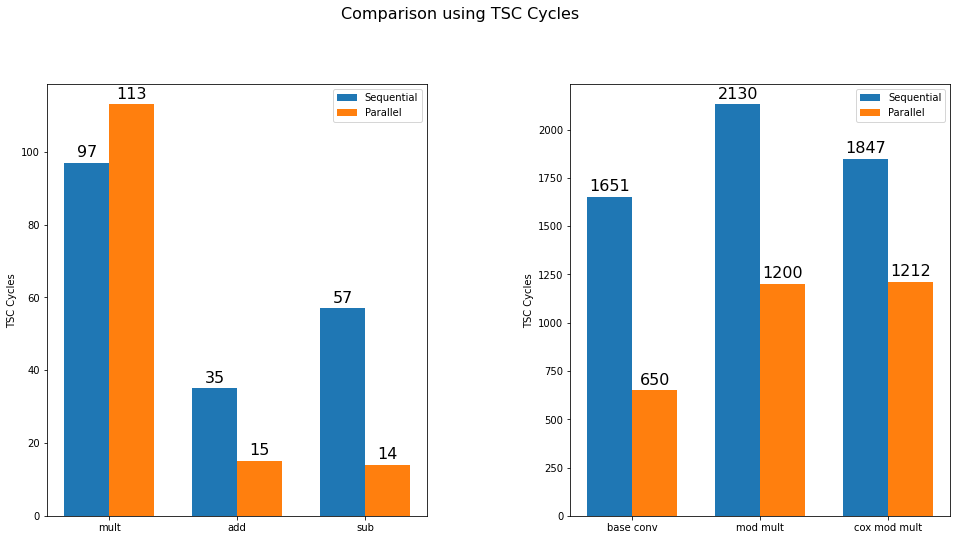

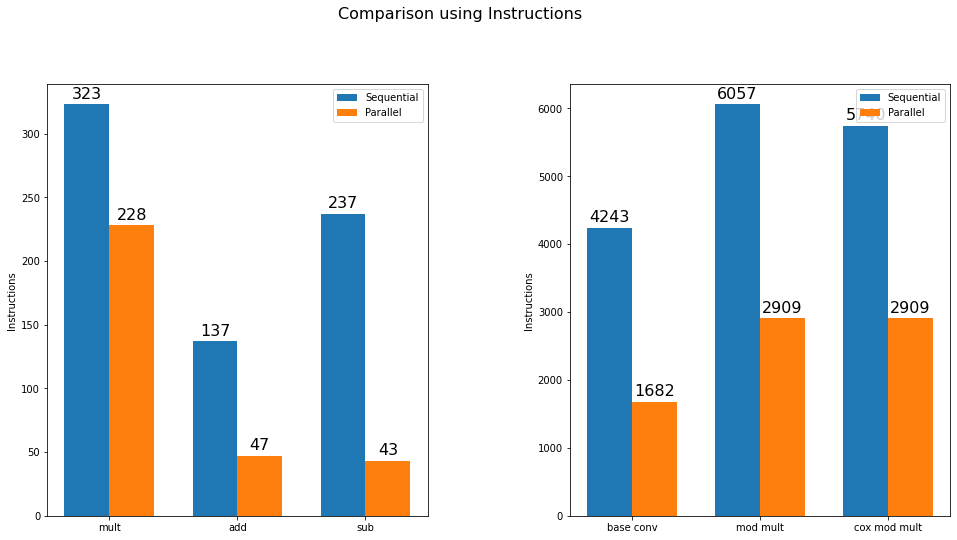

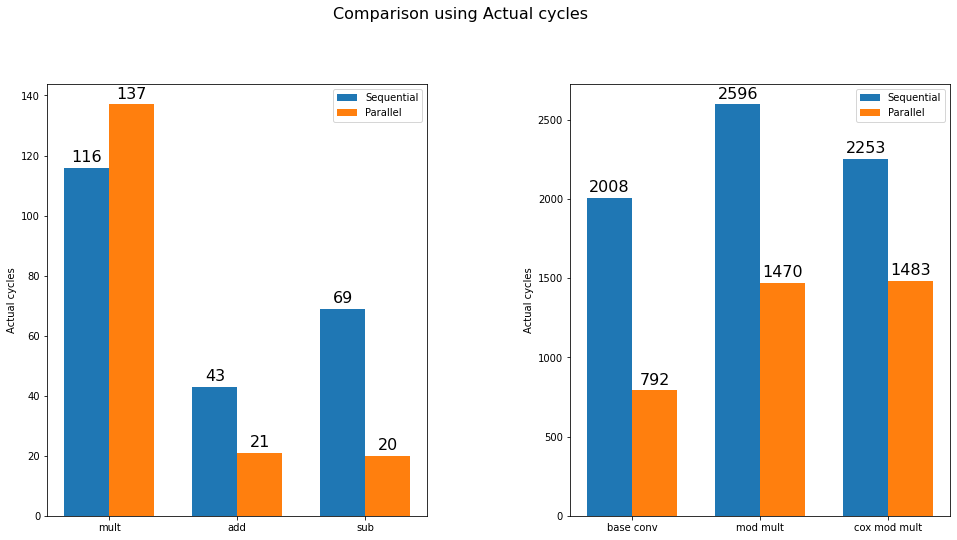

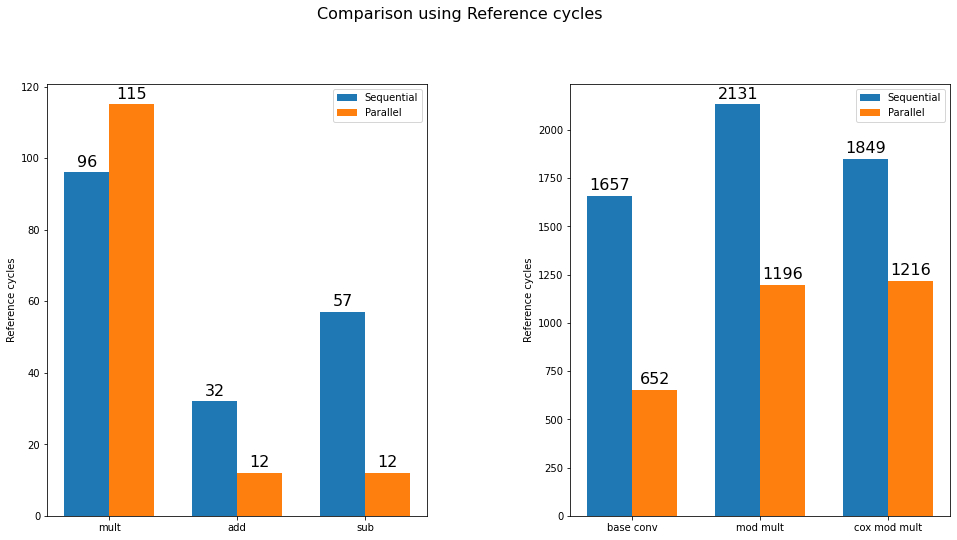

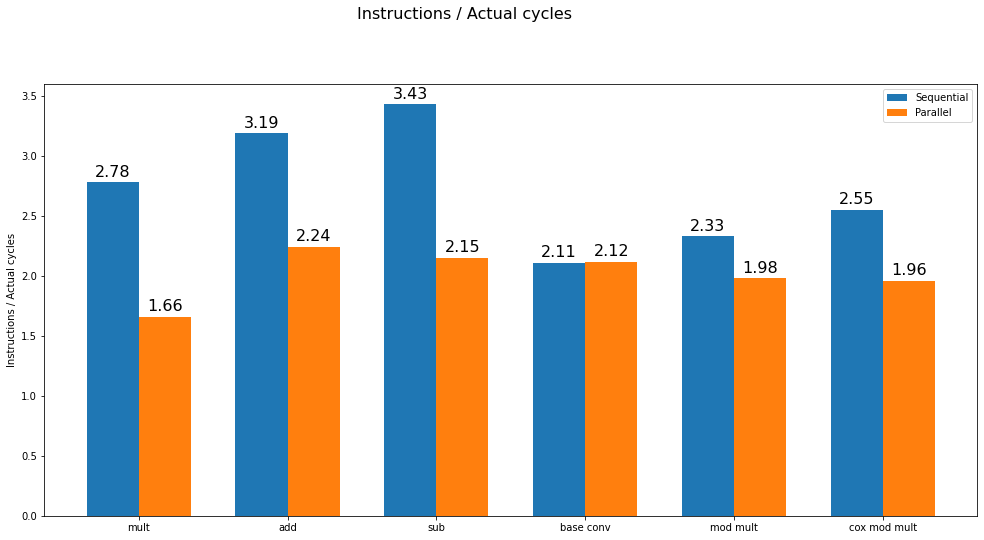

In [16]:
import matplotlib.pyplot as plt
import numpy as np

keys = ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication", "cox_mod_mul"]

for measure in ["TSC Cycles", "Instructions", "Actual cycles", "Reference cycles"]:

    labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]
    sequential = [pick(data, op, "sequential", measure) for op in keys]
    parallel = [pick(data, op, "parallel", measure) for op in keys]

    x = np.arange(3)  # the label locations
    x1 = np.arange(len(keys)//2)
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    rects1 = ax1.bar(x - width/2, sequential[:3], width, label='Sequential')
    rects2 = ax1.bar(x + width/2, parallel[:3], width, label='Parallel')

    rects3 = ax2.bar(x1 - width/2, sequential[3:], width, label='Sequential')
    rects4 = ax2.bar(x1 + width/2, parallel[3:], width, label='Parallel')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle('Comparison using ' + measure, fontsize=16)

    ax1.set_ylabel(measure)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels[:3])
    ax1.legend()

    ax2.set_ylabel(measure)
    ax2.set_xticks(x1)
    ax2.set_xticklabels(labels[3:])
    ax2.legend()

    ax1.bar_label(rects1, padding=3, fontsize=16)
    ax1.bar_label(rects2, padding=3, fontsize=16)

    ax2.bar_label(rects3, padding=3, fontsize=16)
    ax2.bar_label(rects4, padding=3, fontsize=16)

    fig.tight_layout()
    fig.set_size_inches(15,8)
    

# Instructions per cycles
    
labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]

seq_instructions = [pick(data, op, "sequential", "Instructions") for op in keys]
seq_tsc_cycles = [pick(data, op, "sequential", "Actual cycles") for op in keys]

par_instructions = [pick(data, op, "parallel", "Instructions") for op in keys]
par_tsc_cycles = [pick(data, op, "parallel", "Actual cycles") for op in keys]

sequential_ipc = [round(i / j,2) for i, j in zip(seq_instructions, seq_tsc_cycles)]
parallel_ipc = [round(i / j, 2) for i, j in zip(par_instructions, par_tsc_cycles)]
x = np.arange(len(labels))  # the label locations

fig, ax1 = plt.subplots()

rects1 = ax1.bar(x - width/2, sequential_ipc, width, label='Sequential')
rects2 = ax1.bar(x + width/2, parallel_ipc, width, label='Parallel')

fig.suptitle("Instructions / Actual cycles", fontsize=16)

ax1.set_ylabel("Instructions / Actual cycles")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax1.bar_label(rects1, padding=3, fontsize=16)
ax1.bar_label(rects2, padding=3, fontsize=16)

fig.tight_layout()
fig.set_size_inches(15,8)


plt.show()


In [17]:
res = []
operations = list(data.keys())
modes = list(data[operations[0]].keys())
measures = list(data[operations[0]][modes[0]][0].keys())


for operation in operations:
    for mode in modes:
        for measure in measures:
            print(operation + " " + mode + " " + measure + " " + str(min([m[measure] for m in data[operation][mode]])))
        print(operation + " " + mode + " Instructions/Cycles " + str(round(pick(data, operation, mode, "Instructions")/pick(data, operation, mode, "Actual cycles"), 2)))


multiplication sequential TSC Cycles 97
multiplication sequential Instructions 323
multiplication sequential Actual cycles 116
multiplication sequential Reference cycles 96
multiplication sequential Instructions/Cycles 2.78
multiplication parallel TSC Cycles 113
multiplication parallel Instructions 228
multiplication parallel Actual cycles 137
multiplication parallel Reference cycles 115
multiplication parallel Instructions/Cycles 1.66
addition sequential TSC Cycles 35
addition sequential Instructions 137
addition sequential Actual cycles 43
addition sequential Reference cycles 32
addition sequential Instructions/Cycles 3.19
addition parallel TSC Cycles 15
addition parallel Instructions 47
addition parallel Actual cycles 21
addition parallel Reference cycles 12
addition parallel Instructions/Cycles 2.24
substraction sequential TSC Cycles 57
substraction sequential Instructions 237
substraction sequential Actual cycles 69
substraction sequential Reference cycles 57
substraction sequenti

| Operation | TSC Cycles | Instructions | Actual Cycles | Reference Cycles | Instructions / Cycles |
|-|-|-|-|-|-|
|Mult Seq|97|323|116|96|2.78|
|Mult Par|113|228|137|115|1.66|
|Add Seq|35|137|43|32|3.19|
|Add Par|15|47|21|12|2.24|
|Sub Seq|57|327|69|57|3.43|
|Sub Par|14|43|20|12|2.15|
|Base conv Seq|1651|4243|2008|1657|2.11|
|Base conv Par|650|1682|792|652|2.12|
|Mod mult Seq|2130|6057|2596|2131|2.33|
|Mod mult Par|1200|2909|1470|1196|1.98|
|Cox mod mult Seq|1847|5740|2253|1849|2.55|
|Cox mod mult Par|1212|2909|1483|1216|1.96|
|Cox conv base Seq|1340|3927|1634|1337|2.4|
|Cox conv base Par|1673|3164|2040|1670|1.55|